In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

tf.__version__

'2.3.0'

# Environment Initialization and Data Download

In [4]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [5]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download "dgomonov/new-york-city-airbnb-open-data"

  0% 0.00/2.44M [00:00<?, ?B/s]
100% 2.44M/2.44M [00:00<00:00, 80.7MB/s]


In [7]:
!ls -lrt /content

total 2508
drwxr-xr-x 1 root root    4096 Nov 13 17:33 sample_data
-rw-r--r-- 1 root root 2562692 Nov 22 23:18 new-york-city-airbnb-open-data.zip


In [8]:
!mkdir airbnb_new_york_2019_data
!mv new-york-city-airbnb-open-data.zip /content/airbnb_new_york_2019_data/
!unzip /content/airbnb_new_york_2019_data/new-york-city-airbnb-open-data.zip

Archive:  /content/airbnb_new_york_2019_data/new-york-city-airbnb-open-data.zip
  inflating: AB_NYC_2019.csv         
  inflating: New_York_City_.png      


In [9]:
!mv AB_NYC_2019.csv /content/airbnb_new_york_2019_data/
!mv New_York_City_.png /content/airbnb_new_york_2019_data/

# Data preparation and processing

In [2]:
data_path = '/content/airbnb_new_york_2019_data/'
ny_airbnb = pd.read_csv(data_path + 'AB_NYC_2019.csv')
ny_airbnb.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**Drop the uneeded columns and fill none-value with 0**

In [3]:
ny_airbnb.drop(['host_name', 'id', 'host_id', 'last_review'], axis = 'columns', inplace=True)
ny_airbnb['reviews_per_month'] = ny_airbnb['reviews_per_month'].fillna(0)

ny_airbnb.head(5)

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


**Tranform catagorical data into a binary vector representation using One-Hot Encoding**

**Reference: [Introduction to One-Hot Encoding and Pandas get_dummies](https://towardsdatascience.com/what-is-one-hot-encoding-and-how-to-use-pandas-get-dummies-function-922eb9bd4970)**

In [4]:
catagorical_features = ny_airbnb.select_dtypes(include=['object'])

# print(catagorical_features)

ny_airbnb_one_hot = pd.get_dummies(catagorical_features)
ny_airbnb_one_hot.head(5)

,name_ 1 Bed Apt in Utopic Williamsburg,name_ 2-3 bedroom UWS garden triplex,name_ 3 bedroom loft in Williamsburg,name_ A charming Space in Brooklyn,name_ AMAZING TIME SQUARE!!BRICK WALLS!!,name_ Affordable & Cozy,name_ Beautiful Room In Gramercy!!!,name_ Family Friendly Brooklyn House,name_ Heart & Soul of Greenwich Village,"name_ Private 1 bdrm Lefferts Gr, BK apt",name_ Studio apartment in Greenpoint,name_ garden view / female guest,name_ quaint apartment with city views,"name_! ! ! Coliving: live, work, create","name_!! CLASSIC, LUXURY & CHARM !! By Central Park UWS",name_!!! Beautiful private room with backyard.,name_!!! Outpost Coliving . Shared twin room,name_!!!Co-Housing taken to the Next Level /Flatbush/2,name_!!!Living&Working. Beautiful Coliving on Flatbush,name_!!!Outpost Coliving . Flatbush. Cozy shared room,name_!!BEAUTIFUL APARTMENT WITH GARDEN!!,name_!!Cozy 3-person shared room near L train!!,name_!!Renovated shared room in great neighborhood!!,name_!!Studio next to Empire State Bldg.,name_!AMAZING PRIVATE ROOM 2 MIN FROM TRAIN STATION!,name_!Captivating Private Room,name_!PERFECT PRIVATE ROOM PLACE 2MIN FROM THE SUBWAY!,name_!Spacious & Modern Brooklyn Loft!,"name_""ADORABLE CENTRAL 1BD LITTLE ITALY/SOHO""","name_""Bloom of Floral Park"" 1 BR Basement Suite","name_""Borough Border Liner"" Diverse/Convenient/Private","name_""Bushwick in Manhattan"" Interactive, Private Room","name_""Cabin"" —Private Queen Bedroom in Jungly Apartment","name_""Central Park"" View Prvt Room,Mnh","name_""Chill"" Private 1BR Close to A,C,B,D,2,3","name_""Color Me Time Sq."" Interactive Room in Manhattan","name_""Cozy Retreat"" in North Crown Heights","name_""DECO CASA"" 2 Bedroom Greenpoint Brooklyn","name_""Dave's Island Suite""","name_""Desirable Deal on The Park""",...,neighbourhood_Spuyten Duyvil,neighbourhood_St. Albans,neighbourhood_St. George,neighbourhood_Stapleton,neighbourhood_Stuyvesant Town,neighbourhood_Sunnyside,neighbourhood_Sunset Park,neighbourhood_Theater District,neighbourhood_Throgs Neck,neighbourhood_Todt Hill,neighbourhood_Tompkinsville,neighbourhood_Tottenville,neighbourhood_Tremont,neighbourhood_Tribeca,neighbourhood_Two Bridges,neighbourhood_Unionport,neighbourhood_University Heights,neighbourhood_Upper East Side,neighbourhood_Upper West Side,neighbourhood_Van Nest,neighbourhood_Vinegar Hill,neighbourhood_Wakefield,neighbourhood_Washington Heights,neighbourhood_West Brighton,neighbourhood_West Farms,neighbourhood_West Village,neighbourhood_Westchester Square,neighbourhood_Westerleigh,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


**train_test_split()**

**Reference: [train_test_split() method of scikit learn](https://stackoverflow.com/questions/57754373/train-test-split-method-of-scikit-learn)**

In [5]:
# train_data = ny_airbnb[ny_airbnb.columns[ny_airbnb.columns.str.contains('price')==False]]
train_data = ny_airbnb_one_hot[ny_airbnb_one_hot.columns[ny_airbnb_one_hot.columns.str.contains('price')==False]]
target = ny_airbnb['price']

X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=0.1, random_state=42) # why 42?

**Normalize data using Max-Min method**

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()

# x_scaled = min_max_scaler.fit_transform(ny_airbnb_one_hot[ny_airbnb_one_hot.columns[ny_airbnb_one_hot.columns.str.contains('price')==False]])


# X_train = min_max_scaler.fit_transform(ny_airbnb_one_hot[ny_airbnb_one_hot.columns[ny_airbnb_one_hot.columns.str.contains('price')==False]]) #result from one-hot encoding
# X_train = min_max_scaler.fit_transform(X_train) #result from train_test_split()


# Training

**DNN Model**


In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256,activation=tf.nn.relu),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(64,activation=tf.nn.relu),
    tf.keras.layers.Dense(32,activation=tf.nn.relu),
    tf.keras.layers.Dense(16,activation=tf.nn.relu),
    tf.keras.layers.Dense(1,activation=tf.nn.relu)
])

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
history = model.fit(X_train.values, y_train.values, epochs = 100, validation_split = 0.1)

Epoch 1/100


In [ ]:
history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

# Result

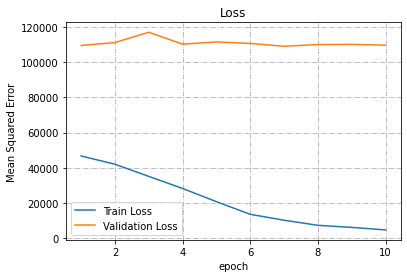

In [18]:
import matplotlib.pyplot as plt

ax = plt.gca()
plt.title('Loss')
k = list(range(1, len(history.history['loss'])+1))
plt.plot(k, history.history['loss'], label='Train Loss')
plt.plot(k, history.history['val_loss'], label='Validation Loss')
ax.grid(linestyle='-.')
plt.ylabel('Mean Squared Error')
plt.xlabel('epoch')

plt.legend()
plt.show()